# Library

In [2]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# interactive plots
%pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.6 MB 1.3 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.6 MB 1.2 MB/s eta 0:00:07
   ---- ----------------------------------- 1.0/9.6 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.6 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.6 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.6 MB 1.2 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.6 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.6 MB 1.3 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.6 MB 1.3 MB/s eta 0:00:06
   ------------- -------------------------- 3.1/9.6 MB 1.2 MB/s eta 0:00:06
   -------------- --------

In [3]:
# offline plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# Data

### 1. API Data

In [5]:
! ls ../input/covid19-corona-virus-india-dataset

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
# MoHFW data
# ==========

import os

file_path = 'covid_19_india.csv'
if os.path.exists(file_path):
	# read data
	df = pd.read_csv(file_path)

	# convert datetime datatype
	df['Date'] = pd.to_datetime(df['Date'])

	# rename columns
	df.columns = ['Sno', 'Date', 'Time', 'State/UnionTerritory', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed']

	# active cases
	df['Active'] = df['Confirmed'] - df['Deaths'] - df['Cured']

	# first few rows
	df.head()
else:
	print(f"File not found: {file_path}")

In [ ]:
# daily
# =====

import os

nation_daily_path = 'covid.csv'
if os.path.exists(nation_daily_path):
	# read data
	daily = pd.read_csv(nation_daily_path)
else:
	print(f"File not found: {nation_daily_path}")
	daily = None

if daily is not None:
	# convert datetime datatype
	daily['Date'] = pd.to_datetime(daily['Date'] + ' 2020')

	# get no. of active cases
	daily['Total Active'] = daily['Total Confirmed'] - daily['Total Deceased'] - daily['Total Recovered']

	# Deaths / 100 cases
	daily['Deaths / 100 Cases'] = round((daily['Total Deceased'] / daily['Total Confirmed'])*100, 2)
	# Recovered / 100 cases
	daily['Recovered / 100 Cases'] = round((daily['Total Recovered'] / daily['Total Confirmed'])*100, 2)
	# Deaths / 100 recovered
	daily['Deaths / 100 Recovered'] = round((daily['Total Deceased'] / daily['Total Recovered'])*100, 2)

	# first few rows
	daily.head()

File not found: ../input/covid19-corona-virus-india-dataset/nation_level_daily.csv


In [ ]:
# states_latest
# =============

import os

states_latest_path = 'C:\Data science\covid-19\covid_vaccine_statewise.csv'
if os.path.exists(states_latest_path):
	# read data
	states_latest = pd.read_csv(states_latest_path)

	# remove the row containing 'Total'
	states_latest = states_latest[states_latest['State']!='Total']

	# mortality rate
	states_latest['Mortality Rate'] = round((states_latest['Deaths'] / states_latest['Confirmed'])*100, 2)

	# recovery rate
	states_latest['Recovery Rate'] = round((states_latest['Recovered'] / states_latest['Confirmed'])*100, 2)

	# first few rows
	states_latest.head()
else:
	print(f"File not found: {states_latest_path}")
	states_latest = None

<>:6: SyntaxWarning:

invalid escape sequence '\D'

<>:6: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\win11\AppData\Local\Temp\ipykernel_7788\3150664252.py:6: SyntaxWarning:

invalid escape sequence '\D'



KeyError: 'Deaths'

In [11]:
# district level latest
# =====================

# read data
dist_latest = pd.read_csv('../input/covid19-corona-virus-india-dataset/district_level_latest.csv')

# remove the column containing unassigned state values
dist_latest = dist_latest[dist_latest['State'] != 'State Unassigned']

# mortality rate
dist_latest['Mortality Rate'] = round((dist_latest['Deceased'] / dist_latest['Confirmed'])*100, 2)
# recovery rate
dist_latest['Recovery Rate'] = round((dist_latest['Recovered'] / dist_latest['Confirmed'])*100, 2)

# first few rows
dist_latest.head()

SlNo State_Code                        State                 District_Key  \
1     1         AN  Andaman and Nicobar Islands                  AN_Nicobars   
2     2         AN  Andaman and Nicobar Islands  AN_North and Middle Andaman   
3     3         AN  Andaman and Nicobar Islands             AN_South Andaman   
4     0         AP               Andhra Pradesh          AP_Foreign Evacuees   
5     4         AP               Andhra Pradesh                 AP_Anantapur   

                   District  Confirmed  Active  Recovered  Deceased  \
1                  Nicobars          0       0          0         0   
2  North and Middle Andaman          1       0          1         0   
3             South Andaman         35       3         32         0   
4          Foreign Evacuees        330     278         52         0   
5                 Anantapur        800     506        288         6   

   Migrated_Other  Delta_Confirmed  Delta_Active  Delta_Recovered  \
1               0                0             0                0   
2               0                0             0                0   
3               0                0             0                0   
4               0                0             0                0   
5               0                0             0                0   

   Delta_Deceased District_Notes  Last_Updated  Mortality Rate  Recovery Rate  
1               0            NaN           NaN             NaN            NaN  
2               0            NaN           NaN            0.00         100.00  
3               0            NaN           NaN            0.00          91.43  
4               0            NaN           NaN            0.00          15.76  
5               0            NaN           NaN            0.75          36.00

In [12]:
# tests day by day
# ================

# read data
tests_dbd = pd.read_csv('../input/covid19-corona-virus-india-dataset/tests_day_wise.csv')

# to datetime datatype
tests_dbd['Update Time Stamp'] = tests_dbd['Update Time Stamp'].str.extract('(\d{1,2}/\d{1,2}/\d{4})')
tests_dbd['Update Time Stamp'] = pd.to_datetime(tests_dbd['Update Time Stamp'], format='%d/%m/%Y')

# first few rwos
tests_dbd.head()

Update Time Stamp  Total Samples Tested  Total Individuals Tested  \
0        2020-03-13                6500.0                    5900.0   
1        2020-03-18               13125.0                   12235.0   
2        2020-03-19               13316.0                   12426.0   
3        2020-03-19               14175.0                   13285.0   
4        2020-03-20               14376.0                   13486.0   

  Total Positive Cases  Tests conducted by Private Labs Sample Reported today  \
0                   78                              NaN                   NaN   
1                  150                              NaN                   NaN   
2                  168                              NaN                   NaN   
3                  182                              NaN                   NaN   
4                  206                              NaN                   NaN   

   Positive cases from samples reported  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

                                        Source Unnamed: 8  \
0           Press_Release_ICMR_13March2020.pdf        NaN   
1      ICMR_website_update_18March_6PM_IST.pdf        NaN   
2  ICMR_website_update_19March_10AM_IST_V2.pdf        NaN   
3      ICMR_website_update_19March_6PM_IST.pdf        NaN   
4     ICMR_website_update_20March_10AM_IST.pdf        NaN   

  Test positivity rate  Individuals Tested Per Confirmed Case  \
0                1.20%                                  75.64   
1                1.14%                                  81.57   
2                1.26%                                  73.96   
3                1.28%                                  72.99   
4                1.43%                                  65.47   

   Tests Per Confirmed Case  Tests per million  
0                     83.33                5.0  
1                     87.50               10.0  
2                     79.26               10.0  
3                     77.88               11.0  
4                     69.79               11.0

In [13]:
# state wise tests statistics
# ===========================

# read data
state_tests = pd.read_csv('../input/covid19-corona-virus-india-dataset/tests_state_wise.csv')

# to datetime datatype
# tests_dbd['Update Time Stamp'] = pd.to_datetime(tests_dbd['Update Time Stamp'])

# first few rwos
state_tests.head()

Updated On                        State  Total Tested Tag (Total Tested)  \
0  17/04/2020  Andaman and Nicobar Islands        1403.0       Samples Sent   
1  24/04/2020  Andaman and Nicobar Islands        2679.0       Samples Sent   
2  27/04/2020  Andaman and Nicobar Islands        2848.0       Samples Sent   
3  01/05/2020  Andaman and Nicobar Islands        3754.0       Samples Sent   
4  16/05/2020  Andaman and Nicobar Islands        6677.0       Samples Sent   

   Positive Negative  Unconfirmed  Cumulative People In Quarantine  \
0      12.0     1210        181.0                              NaN   
1      27.0      NaN        246.0                              NaN   
2      33.0      NaN        106.0                              NaN   
3      33.0      NaN        199.0                              NaN   
4      33.0      NaN        136.0                              NaN   

   Total People Currently in Quarantine Tag (People in Quarantine)  ...  \
0                                   NaN                        NaN  ...   
1                                 614.0              Institutional  ...   
2                                 724.0              Institutional  ...   
3                                 643.0              Institutional  ...   
4                                  16.0              Institutional  ...   

   Num Calls State Helpline                              Source1  Unnamed: 21  \
0                       NaN         https://t.me/indiacovid/2550          NaN   
1                     280.0  https://t.me/indiacovid/3147?single          NaN   
2                     298.0  https://t.me/indiacovid/3365?single          NaN   
3                     340.0         https://t.me/indiacovid/3781          NaN   
4                     471.0         https://t.me/indiacovid/4925          NaN   

   Source2  Unnamed: 23  Test positivity rate  Tests per thousand  \
0      NaN          NaN                 0.86%                3.53   
1      NaN          NaN                 1.01%                6.75   
2      NaN          NaN                 1.16%                7.17   
3      NaN          NaN                 0.88%                9.46   
4      NaN          NaN                 0.49%               16.82   

   Tests per million  Tests per positive case  Population NCP 2019 Projection  
0             3534.0                    117.0                        397000.0  
1             6748.0                     99.0                        397000.0  
2             7174.0                     86.0                        397000.0  
3             9456.0                    114.0                        397000.0  
4            16819.0                    202.0                        397000.0  

[5 rows x 29 columns]

In [14]:
# Patient level data
# ==================

# importing dataset
p_df = pd.read_csv('../input/covid19-corona-virus-india-dataset/patients_data.csv')
# p_df.head(5)

# fixing date format
for col in ['Date Announced', 'Estimated Onset Date', 'Status Change Date']:
    p_df[col] = pd.to_datetime(p_df[col], format='%d/%m/%Y')

# fix nationality values
p_df['Nationality'] = p_df['Nationality'].replace('Indian', 'India')

# first few rows
p_df.head(3)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



Patient Number State Patient Number Date Announced Estimated Onset Date  \
0             1.0             KL-TS-P1     2020-01-30                  NaT   
1             2.0             KL-AL-P1     2020-02-02                  NaT   
2             3.0             KL-KS-P1     2020-02-03                  NaT   

  Age Bracket Gender Detected City Detected District Detected State  \
0          20      F      Thrissur          Thrissur         Kerala   
1         NaN    NaN     Alappuzha         Alappuzha         Kerala   
2         NaN    NaN     Kasaragod         Kasaragod         Kerala   

  State code  ... Nationality Type of transmission Status Change Date  \
0         KL  ...       India             Imported         2020-02-14   
1         KL  ...       India             Imported         2020-02-14   
2         KL  ...       India             Imported         2020-02-14   

                                            Source_1  \
0  https://twitter.com/vijayanpinarayi/status/122...   
1  https://www.indiatoday.in/india/story/kerala-r...   
2  https://www.indiatoday.in/india/story/kerala-n...   

                                            Source_2  \
0  https://weather.com/en-IN/india/news/news/2020...   
1  https://weather.com/en-IN/india/news/news/2020...   
2  https://twitter.com/ANI/status/122422148580539...   

                                            Source_3        Backup Notes  \
0                                                NaN  Student from Wuhan   
1                                                NaN  Student from Wuhan   
2  https://weather.com/en-IN/india/news/news/2020...  Student from Wuhan   

  Num cases Entry_ID Num Cases  
0       1.0      NaN       NaN  
1       1.0      NaN       NaN  
2       1.0      NaN       NaN  

[3 rows x 23 columns]

### 2. Map data

In [15]:
# # District level shape file
# # =========================

# # district level shape file
# dist_shape = gpd.read_file('../input/india-district-wise-shape-files/output.shp')
# # subset columns
# dist_shape = dist_shape[['objectid', 'statecode', 'statename', 'state_ut', 
#                          'distcode', 'distname', 'geometry']]
# # rename states
# dist_shape['statename'] = dist_shape['statename'].str.replace('&', 'and')
# dist_shape['statename'] = dist_shape['statename'].str.replace('NCT of ', '')
# dist_shape['statename'] = dist_shape['statename'].str.replace('Chhatisgarh', 'Chhattisgarh')
# dist_shape['statename'] = dist_shape['statename'].str.replace('Orissa', 'Odisha')
# dist_shape['statename'] = dist_shape['statename'].str.replace('Pondicherry', 'Puducherry')
# # dist_shape.head()


# # State level shape file
# # ======================

# # groupby state to get state level shape file
# states_shape = dist_shape.dissolve(by='statename').reset_index()
# # states_shape.head()

In [16]:
# # grouped district file
# # =====================

# dist_count = p_df.groupby(['detected_district'])['patient_number'].count().reset_index()
# dist_count.columns = ['district', 'count']
# # dist_count.head()


# # grouped state file
# # ==================

# state_count = p_df.groupby(['detected_state'])['patient_number'].count().reset_index()
# state_count.columns = ['state', 'count']
# # state_count.head()

In [17]:
# # District map
# # ============

# # merge shape file with count file
# dist_map = pd.merge(dist_shape, dist_count, left_on='distname', right_on='district', how='left')
# # droping missing values
# dist_map = dist_map[~dist_map['count'].isna()]
# # fixing datatype
# dist_map['count'] = dist_map['count'].astype('int')
# # dist_map.head(3)


# # States map
# # ==========

# # merge shape file with count file
# state_map = pd.merge(states_shape, state_count, left_on='statename', right_on='state', how='right')
# # fill na with 0
# state_map['count'] = state_map['count'].fillna(0)
# # state_map.head(3)

# Latest Data

In [18]:
# Latest Data
# ===========

# sort based on confirmed cases
latest = states_latest.sort_values('Confirmed', ascending=False).reset_index(drop=True)

# remove 'State Unassigned' row
latest = latest[latest['State']!='State Unassigned']

# rearrange columns
latest = latest.loc[:, ['State', 'Confirmed', 'Active', 'Deaths', 'Mortality Rate', 
                        'Recovered', 'Recovery Rate']]

# background color
latest.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
    .background_gradient(cmap="Greens", subset=['Deaths', 'Mortality Rate'])\
    .background_gradient(cmap="Reds", subset=['Recovered', 'Recovery Rate'])

In [19]:
# subset columns
temp = latest[['Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Active', 'Deaths', 'Cured']

# melt into longer format
tm = temp.melt(value_vars=['Active', 'Deaths', 'Cured'])

# plot
fig_1 = px.treemap(tm, path=["variable"], values="value", height=250, 
                 color_discrete_sequence=[act, rec, dth], title='Latest stats')
fig_1.data[0].textinfo = 'label+text+value'
fig_1.show()

# Over Time

In [20]:
def plot_daily(col, hue):
    fig = px.bar(daily, x="Date", y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [21]:
plot_daily('Total Confirmed', '#000000')

In [22]:
plot_daily('Daily Confirmed', '#000000')

In [23]:
plot_daily('Total Active', '#000000')

In [24]:
plot_daily('Total Deceased', dth)

In [25]:
plot_daily('Daily Deceased', dth)

In [26]:
plot_daily('Total Recovered', rec)

In [27]:
plot_daily('Daily Recovered', rec)

In [28]:
def plot_daily(col, hue):
    temp = tests_dbd.copy()
    # temp = temp[~temp[col].isna()]
    fig = px.scatter(temp, x="Update Time Stamp", 
                 y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [29]:
plot_daily('Total Samples Tested', dth)

In [30]:
# stacked bar chart

# subset columns
temp = daily[['Date', 'Total Active', 'Total Deceased', 'Total Recovered']]

# melt data
temp = temp.melt(value_vars=['Total Recovered', 'Total Deceased', 'Total Active'],
                 id_vars="Date", var_name='Case', value_name='Count')
temp.head()

# plot
fig_2 = px.bar(temp, x="Date", y="Count", color='Case', 
               title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig_2.show()

In [31]:
# stacked bar chart

# subset columns
temp = daily[['Date', 'Daily Confirmed', 'Daily Deceased', 'Daily Recovered']]

# melt data
temp = temp.melt(value_vars=['Daily Recovered', 'Daily Deceased', 'Daily Confirmed'],
                 id_vars="Date", var_name='Case', value_name='Count')
temp.head()

# plot
fig_2 = px.bar(temp, x="Date", y="Count", color='Case', 
               title='Daily cases over time', color_discrete_sequence = [rec, dth, act])
fig_2.show()

In [32]:
def plot_stacked(col):
    temp = df.sort_values(col, ascending=False)
    fig = px.bar(df, x="Date", y=col, color='State', 
                 color_discrete_sequence = px.colors.qualitative.Vivid)
    fig.update_layout(title='State wise '+ col, xaxis_title="", yaxis_title="", 
                      showlegend=False)
    fig.show()

In [33]:
plot_stacked('Confirmed')

In [34]:
plot_stacked('Deaths')

In [35]:
plot_stacked('Recovered')

In [36]:
plot_stacked('New cases')

In [37]:
plot_stacked('New deaths')

In [38]:
plot_stacked('New recovered')

In [39]:
# Daily statistics
# ================

temp = daily[daily['Total Confirmed'] > 100]

fig_c = px.line(temp, x="Date", y="Deaths / 100 Cases", color_discrete_sequence=['#000000'])
fig_d = px.line(temp, x="Date", y="Recovered / 100 Cases", color_discrete_sequence=['#649d66'])
fig_r = px.line(temp, x="Date", y="Deaths / 100 Recovered", color_discrete_sequence=['#ff677d'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                    subplot_titles=('No. of Deaths to 100 Cases', 
                                    'No. of Recovered to 100 Cases', 
                                    'No. of Deaths to 100 Recovered'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=1, col=3)

In [40]:
temp = pd.DataFrame(df.groupby('Date').apply(len), columns=['No. of states affected']).reset_index()
temp['Total no. of States/UT'] = 36
temp = temp.melt(id_vars='Date', value_vars=['No. of states affected', 'Total no. of States/UT'])
temp.head()

fig_s = px.line(temp, x="Date", y="value", color='variable', line_dash='variable', 
                color_discrete_sequence=['#000000', '#ef1223'])
fig_s.update_layout(title='No. of States/UT affected', 
                  xaxis_title='', yaxis_title='')
fig_s.show()

In [41]:
temp = daily.loc[:, ['Date', 'Total Active', 'Total Recovered']]
temp = temp.melt(id_vars='Date', value_vars=['Total Active', 'Total Recovered'])
temp.head()

fig_c = px.line(temp, x="Date", y="value", color='variable', line_dash='variable', 
                color_discrete_sequence=[dth, rec])
fig_c.update_layout(title='Active vs Recovered cases', 
                  xaxis_title='', yaxis_title='')
fig_c.show()

# Where does India Stands

In [42]:
def plot_topn(col, n):
    df = world.sort_values(col, ascending=False).head(n)
    fig = px.bar(df, x=col, y='Country/Region', color='Is India?', text=col, 
                 orientation='h', color_discrete_sequence=['#393e46', '#d92027'])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      showlegend=False)
    fig.show()

In [43]:
plot_topn('Confirmed', 10)

In [44]:
plot_topn('1 week change', 10) 

In [45]:
plot_topn('Deaths', 15)

In [46]:
plot_topn('Recovered', 10)

In [47]:
wm = pd.read_csv('../input/corona-virus-report/worldometer_data.csv')
wm['Is India?'] = wm['Country/Region']=='India'

In [48]:
px.scatter(wm, x='TotalCases', y='TotalDeaths', color='Is India?', hover_data=['Country/Region'],
           log_x=True, log_y=True, title='Confirmed vs Deaths',
           color_discrete_sequence=['#393e46', '#d92027'])

In [49]:
px.scatter(wm, x='Tot Cases/1M pop', y='Tests/1M pop', color='Is India?', 
           log_x=True, log_y=True, hover_data=['Country/Region'], title='Tot Cases/1M pop vs Tests/1M pop',
           color_discrete_sequence=['#393e46', '#d92027'])

# Leading States

In [50]:
def plot_topn_states(col, color, n):
    df = states_latest.sort_values(col, ascending=False).head(n)
    fig = px.bar(df, x=col, y='State', text=col, 
                 orientation='h', 
                 color_discrete_sequence=[color])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      showlegend=False)
    fig.show()

In [51]:
plot_topn_states('Confirmed', '#333333', 10)

In [52]:
plot_topn_states('Active', '#333333', 10)

In [53]:
plot_topn_states('Deaths', dth, 10)

In [54]:
plot_topn_states('Mortality Rate', dth, 10)

In [55]:
plot_topn_states('Recovered', rec, 10)

In [56]:
plot_topn_states('Recovery Rate', rec, 10)

In [57]:
px.scatter(states_latest[states_latest['Confirmed']>10000], x='Confirmed', y='Deaths', 
           color='State', size='Confirmed', text='State', 
           log_x =True, log_y=True, title='Confirmed vs Death (Only States with more thatn 10000 cases)')

In [58]:
# fig = px.scatter(df.sort_values('State', ascending=False), 
#                  x='Date', y='State', size='New cases', color='New cases', 
#                  color_continuous_scale=px.colors.sequential.Aggrnyl)
# fig.update_layout(yaxis = dict(dtick = 1))
# fig.update_layout(title='No. of new cases in each state', xaxis_title="", yaxis_title="")
# fig.update_layout(height=900)
# fig.update_layout(coloraxis_showscale=False)
# fig.show()

In [1]:
fig = px.scatter(df.sort_values('State', ascending=False), 
                 x='Date', y='State', size='Active', color='Active', 
                 color_continuous_scale=px.colors.sequential.thermal)
fig.update_layout(yaxis = dict(dtick = 1))
fig.update_layout(title='No. of active cases in each state', xaxis_title="", yaxis_title="")
fig.update_layout(height=900)
fig.update_layout(coloraxis_showscale=False)
fig.show()

NameError: name 'px' is not defined

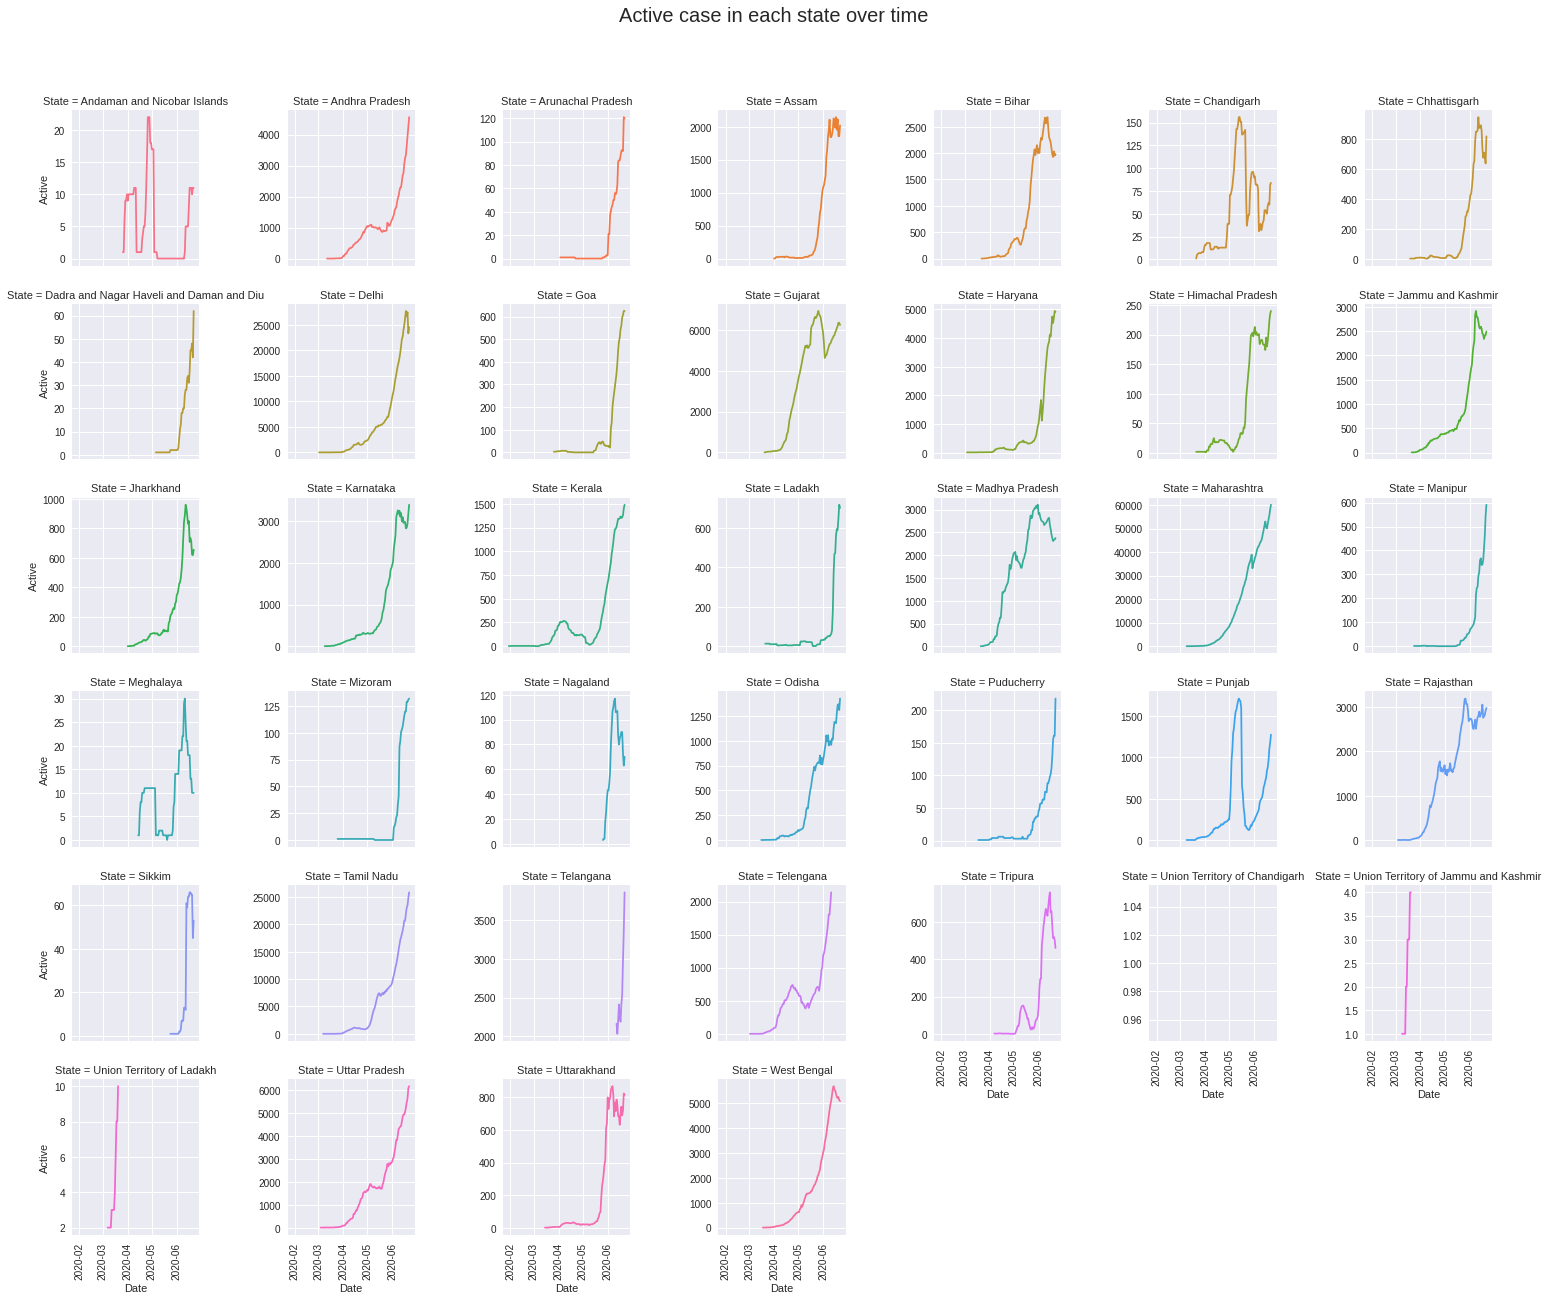

In [60]:
plt.style.use('seaborn')
g = sns.FacetGrid(df.sort_values(['State', 'Date']), 
                  col="State", hue="State", 
                  sharey=False, col_wrap=7)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Active case in each state over time', 
               fontsize=20)
plt.show()

# District level

In [61]:
def plot_topn_dist(x, th, n):
    
    df = dist_latest[dist_latest['Confirmed']>th]
    df = df[df['District']!='Unknown']
    df = df[df['District']!='Other State']
    df = df.sort_values(x, ascending=False).head(n)
    
    title = str(x) +'(Only districts with more than ' + str(th) +' cases)'
    
    fig = px.bar(df, x=x, y='District', color='State', 
                 text=x, orientation='h', 
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=title, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending')
    fig.show()

In [62]:
plot_topn_dist('Confirmed', 100, 10)

In [63]:
plot_topn_dist('Active', 100, 10)

In [64]:
plot_topn_dist('Deceased', 100, 10)

In [65]:
plot_topn_dist('Mortality Rate', 100, 10)

In [66]:
plot_topn_dist('Recovered', 100, 10)

In [67]:
plot_topn_dist('Recovery Rate', 100, 10)

In [68]:
temp = dist_latest.groupby(['State', 'District'])['Confirmed'].sum().reset_index()
temp.head()
fig = px.treemap(temp, path=["State", "District"], values="Confirmed", 
                 height=700, title='Number of Confirmed Cases', 
                 color_discrete_sequence = px.colors.qualitative.Vivid)
fig.data[0].textinfo = 'label+text+value'
fig.show()

In [69]:
# leg_kwds={'title':'No. of case',
#           'loc': 'upper right',
#           'ncol':1}

# fig, ax = plt.subplots(figsize=(10, 10))
# dist_shape.plot(ax=ax, color='whitesmoke')
# dist_map.plot(column='count', cmap='GnBu', ax=ax, legend=True, 
#               k=5, scheme='Quantiles', legend_kwds=leg_kwds)
# plt.title('District level')
# ax.set_axis_off()
# plt.show()

# Patient wise Data

In [70]:
def print_missing(col):
    print('Total no. of values :', p_df.shape[0], \
          '\nNo. of missing values :', p_df.shape[0]-p_df[[col]].dropna().shape[0], \
          '\nNo. of available values :', p_df.shape[0]-(p_df.shape[0]-p_df[[col]].dropna().shape[0]))

In [71]:
print_missing('Age Bracket')

px.histogram(p_df, x='Age Bracket', color_discrete_sequence = ['#35495e'], 
             nbins=50, title='Distribution of ages of confirmed patients')

Total no. of values : 100284 
No. of missing values : 62443 
No. of available values : 37841


In [72]:
def print_missing_vals():
    print('Total no. of values :', p_df.shape[0], 
          '\nNo. of missing values :', p_df.shape[0]-temp.shape[0], 
          '\nNo. of available values :', p_df.shape[0]-(p_df.shape[0]-temp.shape[0]))

In [73]:
fig = make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Gender vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = p_df[['Age Bracket', 'Gender']].dropna()

print_missing_vals()

gen_grp = temp.groupby('Gender').count()

fig.add_trace(go.Histogram(x=temp[temp['Gender']=='F']['Age Bracket'], nbinsx=50, name='Female', marker_color='#6a0572'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['Gender']=='M']['Age Bracket'], nbinsx=50, name='Male', marker_color='#39065a'), 1, 1)

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Female', 'Male'], marker_colors = ['#6a0572', '#39065a']),1, 2)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[2].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 100284 
No. of missing values : 63163 
No. of available values : 37121


In [74]:
fig = make_subplots(
    rows=1, cols=2, column_widths=[0.8, 0.2],
    subplot_titles = ['Cases vs Age', ''],
    specs=[[{"type": "histogram"}, {"type": "pie"}]]
)

temp = p_df[['Age Bracket', 'Current Status']].dropna()

print_missing_vals()

gen_grp = temp.groupby('Current Status').count()

fig.add_trace(go.Pie(values=gen_grp.values.reshape(-1).tolist(), labels=['Deceased', 'Hospitalized', 'Recovered'], 
                     marker_colors = ['#fd0054', '#393e46', '#40a798'], hole=.3),1, 2)

fig.add_trace(go.Histogram(x=temp[temp['Current Status']=='Deceased']['Age Bracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['Current Status']=='Recovered']['Age Bracket'], nbinsx=50, name='Recovered', marker_color='#40a798'), 1, 1)
fig.add_trace(go.Histogram(x=temp[temp['Current Status']=='Hospitalized']['Age Bracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'), 1, 1)

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.data[0].textinfo = 'label+text+value+percent'

fig.show()

Total no. of values : 100284 
No. of missing values : 62443 
No. of available values : 37841


In [75]:
p_df['Type of transmission'] = p_df['Type of transmission'].replace('Imported ', 'Imported')
p_df['Type of transmission'] = p_df['Type of transmission'].replace('Unknown', 'TBD')

temp = pd.DataFrame(p_df[['Type of transmission']].groupby('Type of transmission')['Type of transmission'].count())
temp = temp.dropna()
temp.columns = ['count']
temp = temp.reset_index().sort_values(by='count')

print('Total no. of values :', p_df.shape[0], '\nNo. of missing values :', p_df.shape[0]-temp['count'].sum(), '\nNo. of available values :', temp['count'].sum())

fig = px.bar(temp, x='count', y='Type of transmission', orientation='h', text='count', width=600, height=300,
       color_discrete_sequence = ['#35495e'], title='Type of transmission')
fig.update_xaxes(title='')
fig.update_yaxes(title='')
fig.show()

Total no. of values : 100284 
No. of missing values : 97294 
No. of available values : 2990


# Week wise

In [76]:
daily['Month'] = pd.DatetimeIndex(daily['Date']).month
daily['Week No.'] = daily['Date'].dt.strftime('%U')
daily.head()

Date  Daily Confirmed  Total Confirmed  Daily Recovered  \
0 2020-01-30                1                1                0   
1 2020-01-31                0                1                0   
2 2020-02-01                0                1                0   
3 2020-02-02                1                2                0   
4 2020-02-03                1                3                0   

   Total Recovered  Daily Deceased  Total Deceased  Total Active  \
0                0               0               0             1   
1                0               0               0             1   
2                0               0               0             1   
3                0               0               0             2   
4                0               0               0             3   

   Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Month  \
0                 0.0                    0.0                     NaN      1   
1                 0.0                    0.0                     NaN      1   
2                 0.0                    0.0                     NaN      2   
3                 0.0                    0.0                     NaN      2   
4                 0.0                    0.0                     NaN      2   

  Week No.  
0       04  
1       04  
2       04  
3       05  
4       05

In [77]:
week_wise = daily.groupby('Week No.')['Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 
                                      'Total Recovered', 'Daily Deceased', 'Total Deceased'].sum().reset_index()
week_wise.columns = ['Week No.', 'New Confirmed', 'Total Confirmed', 'New Recovered', 
                      'Total Recovered', 'New Deceased', 'Total Deceased']
week_wise.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Week No.  New Confirmed  Total Confirmed  New Recovered  Total Recovered  \
0       04              1                3              0                0   
1       05              2               20              0                0   
2       06              0               21              1                3   
3       07              0               21              2               17   
4       08              0               21              0               21   

   New Deceased  Total Deceased  
0             0               0  
1             0               0  
2             0               0  
3             0               0  
4             0               0

In [78]:
def plot_weekly(col, hue):
    fig = px.bar(week_wise, x="Week No.", y=col, title=col, 
                 width=700, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [79]:
plot_weekly('Total Confirmed', 'black')

In [80]:
plot_weekly('New Confirmed', 'black')

In [81]:
plot_weekly('Total Deceased', 'crimson')

In [82]:
plot_weekly('New Deceased', 'crimson')

In [83]:
plot_weekly('Total Recovered', 'green')

In [84]:
plot_weekly('New Recovered', 'green')

# Month wise

In [85]:
month_wise = daily.groupby('Month')['Daily Confirmed', 'Total Confirmed', 'Daily Recovered', 
                                    'Total Recovered', 'Daily Deceased', 'Total Deceased'].sum().reset_index()
month_wise.columns = ['Month', 'New Confirmed', 'Total Confirmed', 'New Recovered', 
                      'Total Recovered', 'New Deceased', 'Total Deceased']
month_wise.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Month  New Confirmed  Total Confirmed  New Recovered  Total Recovered  \
0      1              1                2              0                0   
1      2              2               84              3               41   
2      3           1632            10835            147              912   
3      4          33231           449253           8909            86229   
4      5         155783          3089422          82803          1217126   

   New Deceased  Total Deceased  
0             0               0  
1             0               0  
2            47             237  
3          1107           14499  
4          4252           94227

In [86]:
def plot_monthly(col, hue):
    fig = px.bar(month_wise, x="Month", y=col, title=col, 
                 width=600, color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [87]:
plot_monthly('Total Confirmed', 'black')

In [88]:
plot_monthly('New Confirmed', 'black')

In [89]:
plot_monthly('Total Deceased', 'crimson')

In [90]:
plot_monthly('New Deceased', 'crimson')

In [91]:
plot_monthly('Total Recovered', 'Green')

In [92]:
plot_monthly('New Recovered', 'green')